In [1]:
import gym
from shinrl import DiscreteViSolver
import matplotlib.pyplot as plt

# DQN QuickStart

![QuickStart](../assets/quickstart.png)

In [2]:
# make an env & a config
env = gym.make("ShinPendulum-v0")
config = DiscreteViSolver.DefaultConfig(explore="eps_greedy", approx="nn", steps_per_epoch=10000)

In [3]:
# make mixins
mixins = DiscreteViSolver.make_mixins(env, config)
mixins

[shinrl.solvers.discrete_vi._build_calc_params_mixin.BuildCalcParamsRlMixIn,
 shinrl.solvers.discrete_vi._step_mixin.DeepRlStepMixIn,
 shinrl.solvers.discrete_vi._target_mixin.QTargetMixIn,
 shinrl.solvers.discrete_vi._build_table_mixin.BuildTableMixIn,
 shinrl.solvers.discrete_vi._build_net_act_mixin.BuildNetActMixIn,
 shinrl.solvers.discrete_vi._build_net_mixin.BuildNetMixIn,
 shinrl.solvers.base.base_mixin.BaseShinExploreMixIn,
 shinrl.solvers.base.base_mixin.BaseShinEvalMixIn,
 shinrl.solvers.discrete_vi.solver.DiscreteViSolver]

In [4]:
# make & run a solver
dqn_solver = DiscreteViSolver.factory(env, config, mixins)
dqn_solver.run()

2022-01-07T06:42:56.486977Z set_config is called.          config={'seed': 0, 'discount': 0.99, 'eval_trials': 10, 'eval_interval': 100, 'add_interval': 100, 'steps_per_epoch': 10000, 'verbose': True, 'explore': <EXPLORE.eps_greedy: 2>, 'evaluate': <EVALUATE.greedy: 2>, 'approx': <APPROX.nn: 2>, 'lr': 0.001, 'num_samples': 4, 'buffer_size': 1000000, 'batch_size': 32, 'er_coef': 0.0, 'kl_coef': 0.0, 'logp_clip': -100000000.0, 'use_double_q': False, 'eps_end': 0.1, 'eps_warmup': 0, 'eps_decay': 100000, 'softmax_tmp': 1.0, 'hidden': 128, 'depth': 2, 'target_update_interval': 1000, 'activation': <ACTIVATION.relu: 15>, 'optimizer': <OPTIMIZER.adam: 11>, 'loss_fn': <LOSS.l2_loss: 5>} env_id=None solver_id=MixedSolver-0
2022-01-07T06:42:56.487963Z set_env is called.             env_id=0 solver_id=MixedSolver-0
2022-01-07T06:42:56.490031Z Solver is initialized.         env_id=0 methods=['BaseSolver.__init__', 'BuildNetActMixIn._build_act_fn', 'BuildCalcParamsRlMixIn._build_calc_params', 'Build

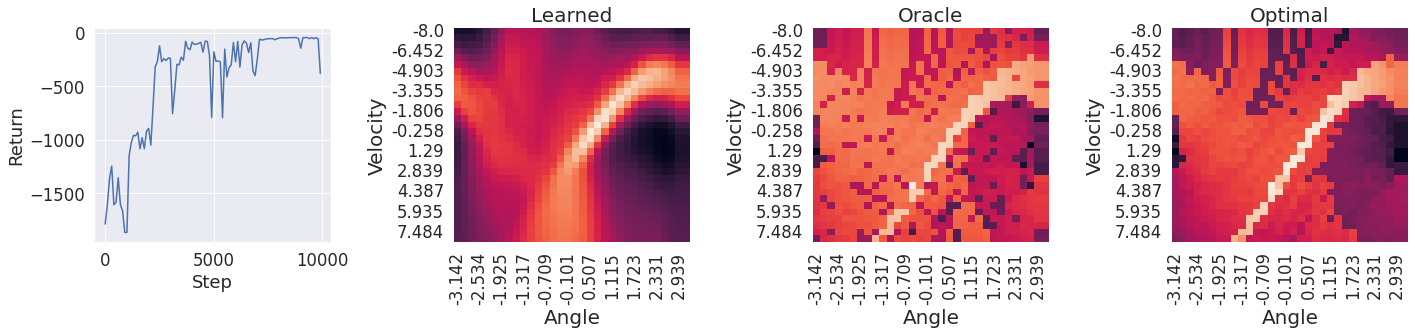

In [5]:
import seaborn as sns
grid_kws = {"width_ratios": (0.25, 0.25, 0.25, 0.25)}
sns.set(font_scale=1.5)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), gridspec_kw=grid_kws)


# plot performance
returns = dqn_solver.scalars["Return"]
axes[0].plot(returns["x"], returns["y"])
axes[0].set_ylabel("Return")
axes[0].set_xlabel("Step")

# plot learned q-values  (act == 0)
q0 = dqn_solver.data["Q"][:, 0]
env.plot_S(q0, title="Learned", ax=axes[1], fontsize=20)

# plot oracle q-values  (act == 0)
q0 = env.calc_q(dqn_solver.data["EvaluatePolicy"])[:, 0]
env.plot_S(q0, title="Oracle", ax=axes[2], fontsize=20)

# plot optimal q-values  (act == 0)
q0 = env.calc_optimal_q()[:, 0]
env.plot_S(q0, title="Optimal", ax=axes[3], fontsize=20)

plt.tight_layout()

# Arrange Mixins

![MixIn](../assets/MixIn.png)

In [6]:
# (optional) arrange mixins
# Insert a mixin that scale computed Q-targets as an example:

class ScaleQMixIn:
    def target_deep_rl(self, prms_dict, samples):
        q_targ = super().target_deep_rl(prms_dict, samples)
        return q_targ * 0.1
    
mixins.insert(1, ScaleQMixIn)
mixins

[shinrl.solvers.discrete_vi._build_calc_params_mixin.BuildCalcParamsRlMixIn,
 __main__.ScaleQMixIn,
 shinrl.solvers.discrete_vi._step_mixin.DeepRlStepMixIn,
 shinrl.solvers.discrete_vi._target_mixin.QTargetMixIn,
 shinrl.solvers.discrete_vi._build_table_mixin.BuildTableMixIn,
 shinrl.solvers.discrete_vi._build_net_act_mixin.BuildNetActMixIn,
 shinrl.solvers.discrete_vi._build_net_mixin.BuildNetMixIn,
 shinrl.solvers.base.base_mixin.BaseShinExploreMixIn,
 shinrl.solvers.base.base_mixin.BaseShinEvalMixIn,
 shinrl.solvers.discrete_vi.solver.DiscreteViSolver]

In [7]:
# make & run a solver
dqn_solver = DiscreteViSolver.factory(env, config, mixins)
dqn_solver.run()

2022-01-07T06:43:11.101882Z set_config is called.          config={'seed': 0, 'discount': 0.99, 'eval_trials': 10, 'eval_interval': 100, 'add_interval': 100, 'steps_per_epoch': 10000, 'verbose': True, 'explore': <EXPLORE.eps_greedy: 2>, 'evaluate': <EVALUATE.greedy: 2>, 'approx': <APPROX.nn: 2>, 'lr': 0.001, 'num_samples': 4, 'buffer_size': 1000000, 'batch_size': 32, 'er_coef': 0.0, 'kl_coef': 0.0, 'logp_clip': -100000000.0, 'use_double_q': False, 'eps_end': 0.1, 'eps_warmup': 0, 'eps_decay': 100000, 'softmax_tmp': 1.0, 'hidden': 128, 'depth': 2, 'target_update_interval': 1000, 'activation': <ACTIVATION.relu: 15>, 'optimizer': <OPTIMIZER.adam: 11>, 'loss_fn': <LOSS.l2_loss: 5>} env_id=None solver_id=MixedSolver-1
2022-01-07T06:43:11.102582Z set_env is called.             env_id=0 solver_id=MixedSolver-1
2022-01-07T06:43:11.104838Z Solver is initialized.         env_id=0 methods=['BaseSolver.__init__', 'BuildNetActMixIn._build_act_fn', 'BuildCalcParamsRlMixIn._build_calc_params', 'Build

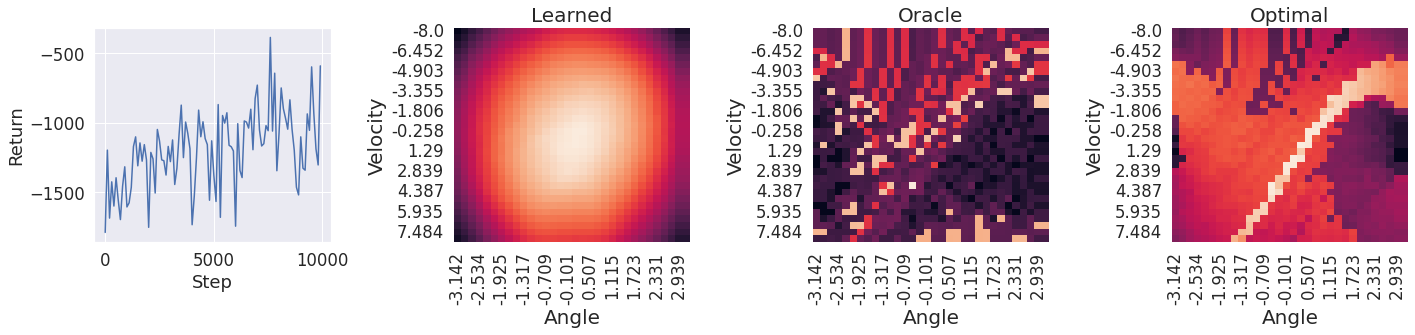

In [8]:
import seaborn as sns
grid_kws = {"width_ratios": (0.25, 0.25, 0.25, 0.25)}
sns.set(font_scale=1.5)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), gridspec_kw=grid_kws)


# plot performance
returns = dqn_solver.scalars["Return"]
axes[0].plot(returns["x"], returns["y"])
axes[0].set_ylabel("Return")
axes[0].set_xlabel("Step")

# plot learned q-values  (act == 0)
q0 = dqn_solver.data["Q"][:, 0]
env.plot_S(q0, title="Learned", ax=axes[1], fontsize=20)

# plot oracle q-values  (act == 0)
q0 = env.calc_q(dqn_solver.data["EvaluatePolicy"])[:, 0]
env.plot_S(q0, title="Oracle", ax=axes[2], fontsize=20)

# plot optimal q-values  (act == 0)
q0 = env.calc_optimal_q()[:, 0]
env.plot_S(q0, title="Optimal", ax=axes[3], fontsize=20)

plt.tight_layout()

# Continual Running

In [9]:
import gym
from shinrl import DiscreteViSolver
import matplotlib.pyplot as plt
from celluloid import Camera
import seaborn as sns

In [10]:
env = gym.make("ShinPendulum-v0")
config = DiscreteViSolver.DefaultConfig(explore="eps_greedy", approx="nn", steps_per_epoch=1000)
mixins = DiscreteViSolver.make_mixins(env, config)
dqn_solver = DiscreteViSolver.factory(env, config, mixins)

2022-01-07T06:43:24.154882Z set_config is called.          config={'seed': 0, 'discount': 0.99, 'eval_trials': 10, 'eval_interval': 100, 'add_interval': 100, 'steps_per_epoch': 1000, 'verbose': True, 'explore': <EXPLORE.eps_greedy: 2>, 'evaluate': <EVALUATE.greedy: 2>, 'approx': <APPROX.nn: 2>, 'lr': 0.001, 'num_samples': 4, 'buffer_size': 1000000, 'batch_size': 32, 'er_coef': 0.0, 'kl_coef': 0.0, 'logp_clip': -100000000.0, 'use_double_q': False, 'eps_end': 0.1, 'eps_warmup': 0, 'eps_decay': 100000, 'softmax_tmp': 1.0, 'hidden': 128, 'depth': 2, 'target_update_interval': 1000, 'activation': <ACTIVATION.relu: 15>, 'optimizer': <OPTIMIZER.adam: 11>, 'loss_fn': <LOSS.l2_loss: 5>} env_id=None solver_id=MixedSolver-2
2022-01-07T06:43:24.155423Z set_env is called.             env_id=0 solver_id=MixedSolver-2
2022-01-07T06:43:24.157624Z Solver is initialized.         env_id=0 methods=['BaseSolver.__init__', 'BuildNetActMixIn._build_act_fn', 'BuildCalcParamsRlMixIn._build_calc_params', 'BuildN

Epoch 0: 100%|█| 1000/1000 [00:02<00:00,
2022-01-07T06:43:26.396204Z Epoch 1 has ended.             data=['n_step', 'n_epoch', 'QNetParams', 'QNetTargParams', 'QOptState', 'Q', 'ExplorePolicy', 'EvaluatePolicy'] env_id=0 epoch_summary={'Return': {'Average': -1570.5182006835937, 'Max': -1248.11328125, 'Min': -1868.8594970703125}, 'Loss': {'Average': 3.564221725612879, 'Max': 34.33945846557617, 'Min': 0.030261501669883728}} solver_id=MixedSolver-2
Epoch 1: 100%|█| 1000/1000 [00:01<00:00,
2022-01-07T06:43:27.959547Z Epoch 2 has ended.             data=['n_step', 'n_epoch', 'QNetParams', 'QNetTargParams', 'QOptState', 'Q', 'ExplorePolicy', 'EvaluatePolicy'] env_id=0 epoch_summary={'Return': {'Average': -1167.7497614080255, 'Max': -922.32080078125, 'Min': -1869.569091796875}, 'Loss': {'Average': 3.746978669004007, 'Max': 38.579322814941406, 'Min': 0.030261501669883728}} solver_id=MixedSolver-2
Epoch 2: 100%|█| 1000/1000 [00:01<00:00,
2022-01-07T06:43:29.424954Z Epoch 3 has ended.           

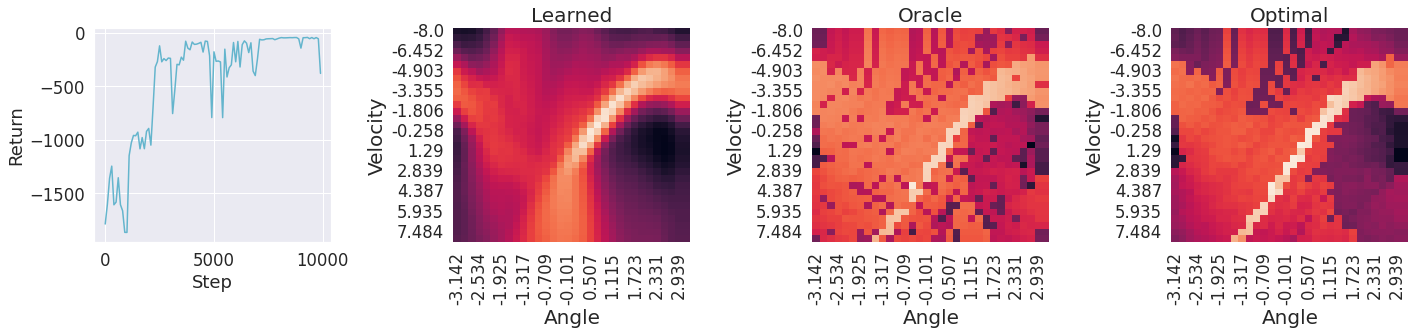

In [11]:
grid_kws = {"width_ratios": (0.25, 0.25, 0.25, 0.25)}
sns.set(font_scale=1.5)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), gridspec_kw=grid_kws)
camera = Camera(fig)


for _ in range(10):
    dqn_solver.run()

    # plot performance
    returns = dqn_solver.scalars["Return"]
    axes[0].plot(returns["x"], returns["y"])
    axes[0].set_ylabel("Return")
    axes[0].set_xlabel("Step")
    
    # plot learned q-values  (act == 0)
    q0 = dqn_solver.data["Q"][:, 0]
    env.plot_S(q0, title="Learned", ax=axes[1], fontsize=20)

    # plot oracle q-values  (act == 0)
    q0 = env.calc_q(dqn_solver.data["EvaluatePolicy"])[:, 0]
    env.plot_S(q0, title="Oracle", ax=axes[2], fontsize=20)

    # plot optimal q-values  (act == 0)
    q0 = env.calc_optimal_q()[:, 0]
    env.plot_S(q0, title="Optimal", ax=axes[3], fontsize=20)

    plt.tight_layout()
    camera.snap()
    
animation = camera.animate()
animation.save("./results/continual.gif")